In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib nbagg

import os, sys

## add root directory to path, to allow for imports 
root_dir = os.path.dirname(os.path.abspath(os.getcwd()))
if not root_dir in sys.path: sys.path.append(root_dir)

from darkMatter import darkMatter
from utils.plots import *
from utils.parameters import *

{'L': 1, 'P': 1, 'S': [1], 'eps': 0.0, 'eta': 0.9, 'J0_l': array([[0.]]), 'I_ext': 1, 'rateWnt': 1.0, 'kappa': [1.0], 'alpha_0': 0.01, 'Psi_0': 0.0, 'tau_M': 0.01, 'J0': [-1.0], 'tau_I': 0.005, 'tau_n': 0.0, 'tau_norm': 1.0, 'mode': 0, 'mode_stats': 1, 'mode_calc': 0, 'mode_selfcon': 0, 'simulation': {'rateWnt': [0, 20], 'alpha_0': [0.0, 0.02, 0.04], 'sim_prim': [0, -1, 0], 'sim_sec': [0, -1, 0]}}
def done 
[2.0000e-03 4.0000e-03 6.0000e-03 ... 1.9996e+01 1.9998e+01 2.0000e+01]


<IPython.core.display.Javascript object>


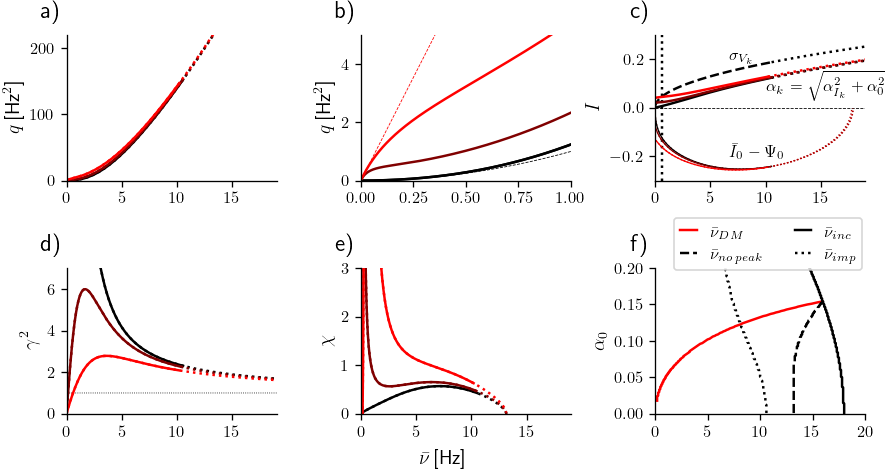

{'title': {'descr': False, 'x_offset': -0.2}, 'x': {'key': 'rateWnt', 'lim': 1}}
def done 
(200, 1)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True

In [3]:
## set model parameters and options
steps = 10000
options = set_options(L=1,nI=1,nE=0)

rerun = False
save=False
file_format='png'
dpi=300

options['simulation'] = {
    #'eta': [0.,np.sqrt(1/2.)],
    #'eps': [0.,0.7],
    'rateWnt': [0,20],
    'alpha_0': [0.0,0.02,0.04],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}
options['mode_stats'] = 1
options['tau_I'] = 0.005
options['tau_n'] = 0.0
options['eps'] = 0.0

print(options)

x_key = [o for o in list(options['simulation']) if not o.startswith('sim')][0]
## execute code
res = darkMatter(steps=steps,options=options,rerun=rerun,compile=False,logging=3)

print(res[x_key])
## prepare plots
set_plot_params()
plt_para = {
    'title': {
        'descr': False,
        'x_offset': -0.2
        },
    'x': {
        'key': x_key, 
        'lim': 19.,
        },
}

fig, ax = plt.subplots(2,3,figsize=(7.5,4),dpi=75)

## general axis, which only provides labels
big_ax = plt.axes([0.1,0.075,0.8,0.8])
big_ax.set_facecolor('none')
big_ax.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off')
big_ax.spines[['top','right','bottom','left']].set_visible(False)
plt.setp(big_ax,xticks=[],yticks=[])

if x_key == 'rateWnt':
    big_ax.set_xlabel(r'$\displaystyle \bar{\nu}\,$[Hz]')
elif x_key == 'eps':
    big_ax.set_xlabel(r'$\displaystyle \varepsilon$')
elif x_key == 'n':
    big_ax.set_xlabel(r'$\displaystyle b$')

## call plotting options
plot_q(ax[0,0],res,plt_para,order=0)
ax[0][0].legend(prop={'size':10},loc='lower right',handlelength=1)
plot_q_zoom(ax[0,1],res,plt_para|{'x':{'key': plt_para['x']['key'], 'lim':1}},order=0)
plot_currents(ax[0,2],res,plt_para,order=0)
plot_gamma(ax[1,0],res,plt_para,order=0)
plot_chi(ax[1,1],res,plt_para,order=0)


options['simulation'] = {
    #'eta': [0.,np.sqrt(1/2.)],
    #'eps': [0.,0.7],
    'rateWnt': [0,20],
    'alpha_0': [0.,0.2],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}


results_bounds = darkMatter(steps=200,options=options,rerun=rerun)
# print(results_bounds.keys())
# print(results_bounds['DM_trans'])
# print(results_bounds['np_trans'])
# print(results_bounds['inc_trans'])
plot_regions(ax[1,2],results_bounds,plt_para|{'x':{'key':plt_para['x']['key'],'lim':20.}},order=0)
plt.subplots_adjust(left=0.075, bottom=0.125, right=0.975, top=0.925, wspace=0.4, hspace=0.6)
for i in range(2):
    for j in range(3):
        set_title(ax[i,j],1+j+3*i,'',(-0.075,0),10)
        plt.setp(ax[i,j],xlabel='')
        
        ax[i,j].spines[['top','right']].set_color('none')
        ax[i,j].xaxis.set_ticks_position('bottom')
        ax[i,j].yaxis.set_ticks_position('left')

#plt.tight_layout()
if save:
    sv_name = f'../figures/heterogeneity_{dpi}dpi.{file_format}'
    plt.savefig(sv_name,format=file_format,dpi=dpi)
    print('Figure saved as "%s"' % sv_name)
else:
    plt.show()

In [12]:
res.keys()

dict_keys(['rateWnt', 'alpha_0', 'q', 'gamma', 'delta', 'rate_max', 'chi', 'I_balance', 'inc_trans', 'imp_trans', 'DM_trans', 'np_trans', 'regions', 'alpha_raw', 'alpha', 'sigma_V'])

{'L': 1, 'P': 2, 'S': [1, 2], 'eps': 0.7071067811865475, 'eta': 0.9, 'J0_l': array([[0.]]), 'I_ext': 1, 'rateWnt': 1.0, 'kappa': [1.0, 1.0], 'alpha_0': 0.02, 'Psi_0': 0.0, 'tau_M': 0.01, 'J0': [-1.0, 1.0], 'tau_I': [0.03, 0.005, 0.2], 'tau_n': 0, 'tau_norm': 1.0, 'mode': 0, 'mode_stats': 1, 'mode_calc': 0, 'mode_selfcon': 0, 'simulation': {'eps': [0.0, 0.7071067811865476], 'eta': [0.2, 0.6, 0.9], 'sim_prim': [0, -1, 0], 'sim_sec': [0, -1, 0]}}


NameError: name 'J_II' is not defined

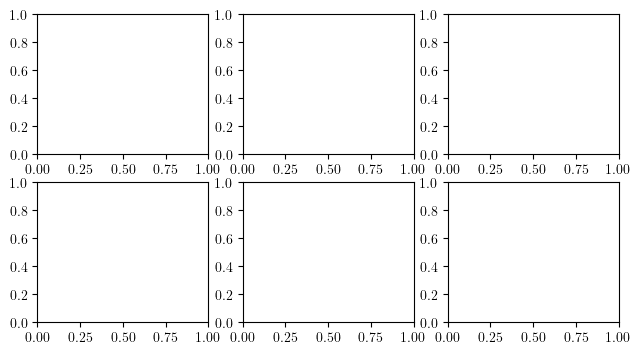

In [16]:
set_plot_params()

options = set_options(L=1,nI=1,nE=1)

options['simulation'] = {
    'eps': [0.,np.sqrt(1./2)],
    'eta': [0.2,0.6,0.9],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}
options['mode_stats'] = 1
options['tau_I'][0] = 0.03
options['alpha_0'] = 0.02
options['tau_n'] = 0

x_key = [o for o in list(options['simulation']) if not o.startswith('sim')][0]

res = darkMatter(steps=100,options=options,rerun=True,compile=False,logging=3)

fig, ax = plt.subplots(2,3,figsize=(7.5,4))
#ax[0,0].set_position([0.1,0.25,0.22,0.6])
#ax[0,1].set_position([0.415,0.25,0.22,0.6])
#ax[0,2].set_position([0.76,0.25,0.22,0.6])

#ax[0,0].legend(prop={'size':10},loc='lower left')
print(options)
tau_M = options['tau_M']

tau_G = options['tau_I'][0]    ## GABA
tau_A = options['tau_I'][1]    ## AMPA
tau_N = options['tau_I'][2]    ## NMDA

eps = options['eps']
eta = options['eta']

n = options['tau_n']
rateWnt = options['rateWnt']

J_EE = res['eta'][2] * res['eps']*tau_M
J_EI = np.sqrt(1-(res['eta'][2]*res['eps'])**2)*tau_M

J_IE = res['eta'][2] * res['eps']*tau_M
J_II = np.sqrt(1-(res['eta'][2]*res['eps'])**2)*tau_M

#J_EE = eta * eps*tau_M
#J_EI = np.sqrt(1-(eta*eps)**2)*tau_M

def get_var_V(J_from_E,J_from_I,rateWnt,tau_A,tau_N,tau_G,tau_M,n):
    ## variance of the membrane potential
    ## from excitatory AMPA synapses
    var_V_A = J_from_E**2 * rateWnt / (tau_A + tau_M) * ( (1-n)**2/2 + (1-n)*n*tau_A / (tau_A + tau_N) )
    ## from excitatory NMDA synapses
    var_V_N = J_from_E**2 * rateWnt / (tau_N + tau_M) * (n**2/2 + (1-n)*n*tau_N / (tau_A + tau_N) )
    ## from inhibitory GABA synapses
    var_V_G = J_from_I**2 * rateWnt * 0.5 / (tau_G + tau_M)
    return var_V_A,var_V_N,var_V_G

var_E_V_A,var_E_V_N,var_E_V_G = get_var_V(J_EE,J_EI,rateWnt,tau_A,tau_N,tau_G,tau_M,n)
var_I_V_A,var_I_V_N,var_I_V_G = get_var_V(J_EI,J_II,rateWnt,tau_A,tau_N,tau_G,tau_M,n)

# var_V_A = J_EE**2 * rateWnt / (tau_A + tau_M) * ( (1-n)**2/2 + (1-n)*n*tau_A / (tau_A + tau_N) )
# #from excitatory NMDA synapses
# var_V_N = J_EE**2 * rateWnt / (tau_N + tau_M) * (n**2/2 + (1-n)*n*tau_N / (tau_A + tau_N) );
# #from inhibitory GABA synapses
# var_V_G = J_EI**2 * rateWnt * 0.5 / (tau_G + tau_M)*np.ones_like(n)

## plot contributions of different synapses
ax[0,0].plot(res[x_key],np.sqrt(var_E_V_G),'k--',label=r'$\displaystyle \sigma_{V_E^G}$ (GABA)')
ax[0,0].plot(res[x_key],np.sqrt(var_E_V_A),'k:',label=r'$\displaystyle \sigma_{V_E^A}$ (AMPA)')
if n > 0:
    ax[0,0].plot(res[x_key],np.sqrt(var_E_V_N),'k-.',label=r'$\displaystyle \sigma_{V_E^N}$ (NMDA)')
    ax[0,0].legend(prop={'size':10},bbox_to_anchor=(0.05,1.2),loc='upper left',ncol=1)
else:
    ax[0,0].text(0.2,0.005,r'$\displaystyle \sigma_{V_{EE}}$ (AMPA) $\displaystyle \hat{=} \sigma_{V_E^A}$',fontsize=10)
    ax[0,0].text(0.1,0.038,r'$\displaystyle \sigma_{V_{EI}}$ (GABA) $\displaystyle \hat{=} \sigma_{V_E^G}$',fontsize=10)

# alpha = J_EE
ax[0,1].plot(res[x_key],np.sqrt(var_E_V_G+var_E_V_A),'k-')
ax[0,1].plot(res[x_key],np.sqrt(var_I_V_G+var_I_V_A),'k-')


if x_key == 'rate':
    plt.setp(ax[0,0],xticks=np.linspace(0,10,6),yticks=np.linspace(0,0.15,4),xlim=[0,res[x_key][-1]],ylim=[0,0.15])
else:
    #plt.setp(ax[0,0],xticks=np.linspace(0,1,6),yticks=np.linspace(0,0.075,4),xlim=[0,res[x_key][0][-1]])#,ylim=[0,0.075])
    for axx in [ax[0][0],ax[0][1]]:
        plt.setp(axx,xticks=np.linspace(0,1,6),yticks=np.linspace(0,0.04,3),xlim=[0,res[x_key][-1]],ylim=[0,0.05])
ax[0,0].set_ylabel(r'$I$')
x_title=0.05
ax[0,0].set_title(r'a)',position=(x_title,1.05))

for ax_row in ax:
    for axx in ax_row:
        axx.spines[['top','right']].set_color('none')
        #a.xaxis.set_ticks_position('bottom')
        #a.yaxis.set_ticks_position('left')

plt.show(block=False)